In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5, style='darkgrid')
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
# load utils
import pathlib
pd.set_option('display.max.columns', 100)

Carga de archivos de los resultados, los resultados estan desagregados.

In [2]:
path = pathlib.Path("data/scalability") 
results = pd.DataFrame()
files = []
for i in path.glob('**/*.csv'):
    partial = pd.read_csv(i.absolute())
    one_class =  i.name.split('.csv')[0]
    print(i, one_class)
    partial['one_class'] = one_class
    results = pd.concat([results, partial], ignore_index = True)


data/scalability/boundaries.csv boundaries
data/scalability/one.csv one


In [3]:
results['is_method'] = np.where(results['isMethod'] == 'drop3', results['isMethod'] + '-' + results['one_class'], results['isMethod'] )
results['total_time'] = results.timeLSH + results.timeIS

In [4]:
results.executors.value_counts()

16    1125
12    1125
6     1125
2      184
Name: executors, dtype: int64

In [5]:
sns.set_palette(sns.color_palette("Paired"))

In [6]:
aspect = 1.5
sns.set(font_scale=1.5, style='whitegrid')
sns.set_context()
sns.set_context("talk")

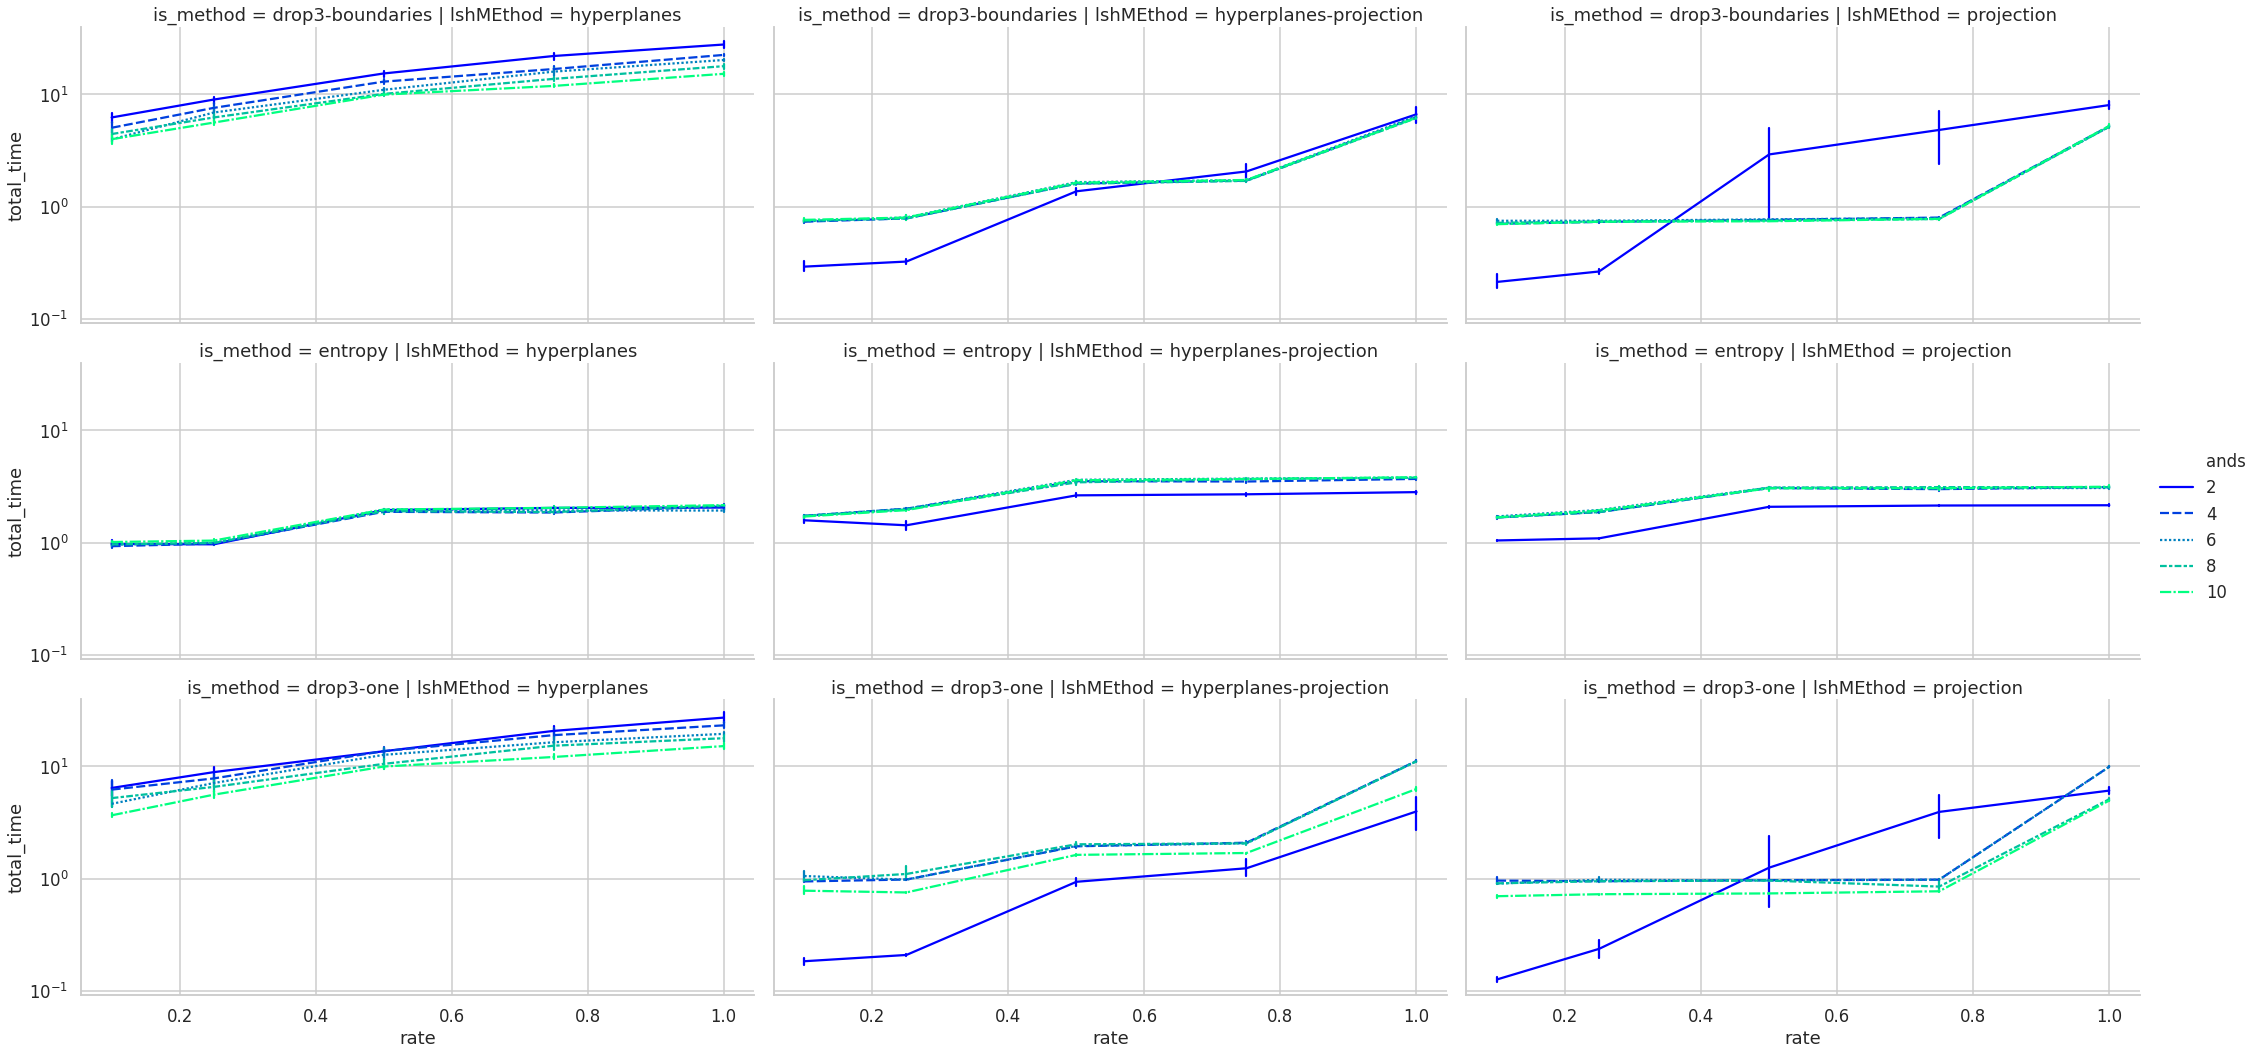

In [7]:
# plot for vertical scalability
g = sns.relplot(data = results[results.executors == 12], 
                x ='rate', 
                y= 'total_time', 
                row = 'is_method', 
                style = 'ands', 
                hue = 'ands', 
                kind = 'line', 
                aspect = 2,
                palette=plt.get_cmap("winter"),
                col = 'lshMEthod',
                facet_kws = {'sharey': 'all'},
                err_style =  'bars',  legend = 'full')
g.set(yscale="log")
g.savefig(f"report/vertical.png")
plt.show()


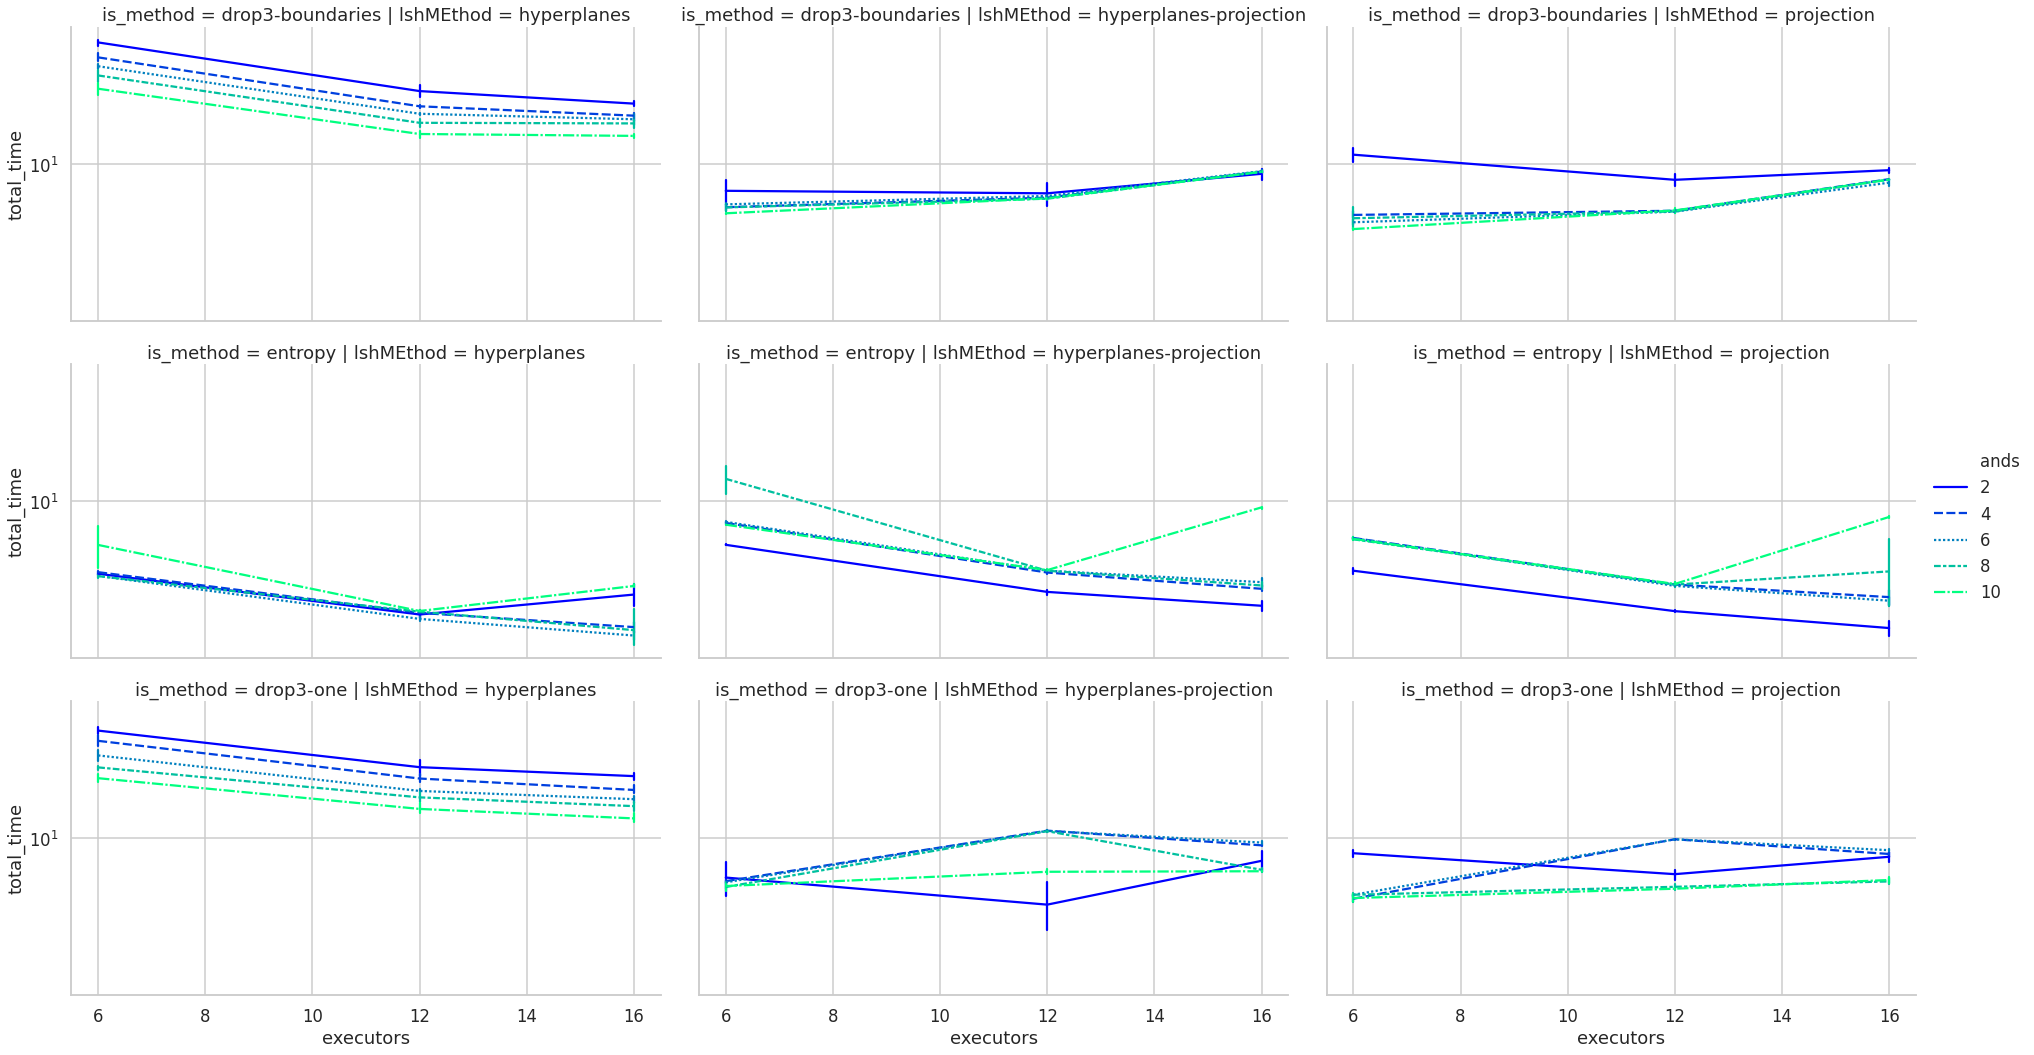

In [8]:
# plot for horizontal scalability
g = sns.relplot(data = results[(results.rate == 1.0) & (results.executors>2)], 
                x ='executors', 
                y= 'total_time', 
                col = 'lshMEthod', 
                row = 'is_method', 
                hue = 'ands',
                style = 'ands', 
                kind = 'line', 
                aspect = 1.8,
                facet_kws = {'sharey': 'all'},
                 palette=plt.get_cmap("winter"),
                err_style =  'bars',  legend = 'full')
g.set(yscale="log")
g.savefig(f"report/horizontal.png")
plt.show()
